In [33]:
import pandas as pd
import numpy as np
import seaborn as se
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm


In [34]:
data_set=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [35]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
data_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
data_set=data_set.dropna()


In [38]:
data_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
#Label Encoding
data_set.replace({"Loan_Status":{'N':0,'Y':1},"Gender":{'Male':1,'Female':0},"Married":{'Yes':1,'No':0},"Dependents":{'3+':4},"Property_Area":{'Rural':1,'Urban':0},"Education":{'Graduate':1,'Not Graduate':0},"Self_Employed":{'No':0,'Yes':1}},inplace=True)

TypeError: ignored

In [41]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [47]:
#number of missing values in the data set
data_set.replace({"Property_Area":{'Semiurban':2}},inplace=True)

In [50]:
data_set['Property_Area'].value_counts()
data_set['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

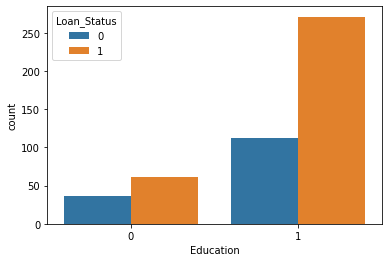

In [54]:
#making the plot using seaborn
se.countplot(x='Education',hue='Loan_Status',data=data_set)

In [55]:
data_set.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.085417,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.839398,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


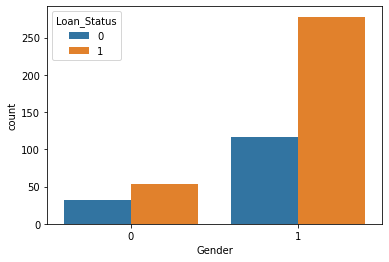

In [57]:
se.countplot(x='Gender',hue='Loan_Status',data=data_set)

In [64]:
x=data_set.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data_set['Loan_Status']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)


In [66]:
print(x_train.shape,y_train.shape)

(384, 11) (384,)


In [67]:
model=svm.SVC(kernel='linear')

In [68]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [69]:
x_pre=model.predict(x_train)
x_acc=accuracy_score(x_pre,y_train)
print(x_acc)

0.7786458333333334


In [73]:
input=(0,0,0,0,0,4408,0.0,120.0,360.0,1.0,2)
answer=np.asarray(input)
ans=answer.reshape(1,-1)
ans=model.predict(ans)
print(ans)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [71]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
205,0,0,0,0,0,4408,0.0,120.0,360.0,1.0,2
549,1,1,0,1,0,2785,2016.0,110.0,360.0,1.0,1
513,1,1,0,1,0,2130,6666.0,70.0,180.0,1.0,2
415,0,0,0,1,0,2995,0.0,60.0,360.0,1.0,0
271,1,1,0,1,0,11146,0.0,136.0,360.0,1.0,0


In [75]:
y_test.head()

205    1
549    1
513    0
415    1
271    1
Name: Loan_Status, dtype: int64